In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
def epsilon () -> float:
    """
    Função que calcula o valor epsilon da máquina e o retorna.
    """
    eps = 1.0
    while eps + 1.0 != 1.0:
        eps *= 0.5

    return eps * 2.0

def f (x: float) -> float:
    return math.exp(-x**2.0)

CRIT_CONVERGENCIA = math.sqrt(epsilon())

In [ ]:
def exp2T (x) -> tuple:
    """
    Função que calcula a aproximação de exp(-x**2) através da sua expansão
    de Taylor, utilizando como criterio de convergencia  epsilon**1/2.
    Retorna uma tupla na forma (resultado aproximado, grau do polinomio)
    
    """
    
    y = math.pow(x, 2)
    m, n, t, s = 0, 1, 1, 1

    while y >= 1:
        m += 1
        y /= 2

    t *= (-y/n)
    s += t

    while abs(t/s) > CRIT_CONVERGENCIA:
        n += 1
        t *= (-y/n)
        s += t

    for _ in range(1, m+1):
        s *= s

    return (s, n)

def erro_abs (x, x_aprox):
    return abs(x - x_aprox)

def erro_rel (x, x_aprox):
    return erro_abs(x, x_aprox)/abs(x)

def pprint (x) -> None:
    """
    Função apenas para printar o que a questão pede de forma pratica.
    """
    valor_f = f(x)
    aprox_fx, n = exp2T(x)
    print(
        f"""
Valor de f({x}) = {valor_f}
Valor utilizando aproximação de exp2T({x}) = {aprox_fx}
Grau do polinômio obtido: {n}
Erro absoluto = {erro_abs(valor_f, aprox_fx)}
Erro relativo = {erro_rel(valor_f, aprox_fx)}
Precisão da maquina = {epsilon()}
        """
    )
pprint(0.5)
pprint(1)
pprint(-0.3)



Valor de f(0.5) = 0.7788007830714049
Valor utilizando aproximação de exp2T(0.5) = 0.7788007830816601
Grau do polinômio obtido: 8
Erro absoluto = 1.0255241100765033e-11
Erro relativo = 1.3167990227643075e-11
Precisão da maquina = 2.220446049250313e-16
        

Valor de f(1) = 0.36787944117144233
Valor utilizando aproximação de exp2T(1) = 0.36787944085923335
Grau do polinômio obtido: 9
Erro absoluto = 3.1220898089046045e-10
Erro relativo = 8.486719994362559e-10
Precisão da maquina = 2.220446049250313e-16
        

Valor de f(-0.3) = 0.9139311852712282
Valor utilizando aproximação de exp2T(-0.3) = 0.9139311852806126
Grau do polinômio obtido: 6
Erro absoluto = 9.38438216024906e-12
Erro relativo = 1.0268149628206471e-11
Precisão da maquina = 2.220446049250313e-16
        


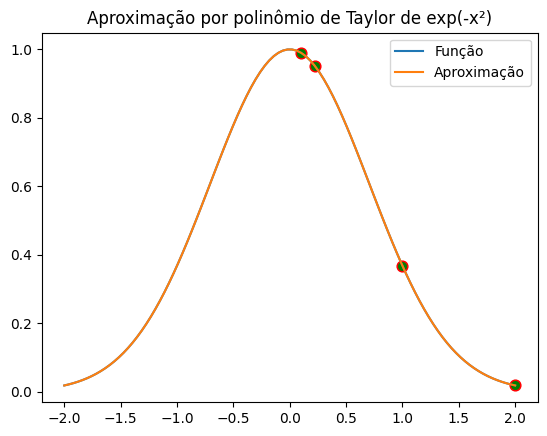

In [8]:
def f_np (x_np: np.ndarray):
    """
    Função para uso de f(x) para plotagem no grafico
    """
    return [f(i) for i in x_np]

def exp2T_np (x_np: np.ndarray):
    """
    Função para uso de exp2T(x) para plotagem no grafico
    """
    return [exp2T(i)[0] for i in x_np]

# Plotagem dos graficos
fig, axe = plt.subplots()

interval = np.linspace(-2, 2, 100)

axe.plot(interval, f_np(interval), label='Função')
axe.plot(interval, exp2T_np(interval), label='Aproximação')

axe.scatter([0.1, 1, 2, .226], [f(x) for x in [0.1, 1, 2, .226]], c='r', s=60)
axe.scatter([0.1, 1, 2, .226], [exp2T(x)[0] for x in [0.1, 1, 2, .226]], c='g', s=30)

plt.title('Aproximação por polinômio de Taylor de exp(-x²)')
plt.legend()

plt.show()
